In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from pathlib import Path
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
import sys
sys.path.append('../../../src')
from eda_utils import get_high_freq_columns, get_corr, get_high_corr_columns, missing_values_percentage

In [3]:
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
data_dir = '../data'

In [5]:
df = pd.read_csv(f"{data_dir}/raw/train.csv", index_col='id').convert_dtypes()
display(df.shape)
df.head(2)

(300000, 31)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.63,0.86,0.76,0.80,0.68,0.62,0.59,0.79,0.82,0.97,0.67,0
1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.37,0.33,0.39,0.54,0.39,0.36,0.60,0.41,0.40,0.93,0.49,0


In [6]:
# profile = df.profile_report(
#     title='Train dataset report',
#     correlations={"cramers": {"calculate": False}},
# )
# profile.to_file(output_file="../reports/eda.html")

### Conclusion from report file
- columns are not normaly distributed

In [7]:
get_high_freq_columns(df, 0.9)

['cat13']

In [8]:
get_high_corr_columns(df, 0.9)

[]

In [9]:
for cols, corr in get_corr(df).items():
    if 'target' in cols:
        print(cols, corr)

('cont0', 'target') 0.0
('cont1', 'target') 0.0
('cont2', 'target') 0.0
('cont3', 'target') 0.0
('cont4', 'target') 0.0
('cont5', 'target') 0.0
('cont6', 'target') 0.0
('cont7', 'target') 0.0
('cont8', 'target') 0.0
('cont9', 'target') 0.0
('cont10', 'target') 0.0
('target', 'cont0') 0.015172498383761937
('target', 'cont1') 0.16465505900773045
('target', 'cont2') 0.14045855091881004
('target', 'cont3') 0.14831607498271024
('target', 'cont4') 0.07558542985284702
('target', 'cont5') 0.2151841896087151
('target', 'cont6') 0.18983182333319498
('target', 'cont7') 0.04064568504433393
('target', 'cont8') 0.18372576476043337
('target', 'cont9') 0.05924163026142124
('target', 'cont10') 0.04707671962540267
('target', 'target') 1.0


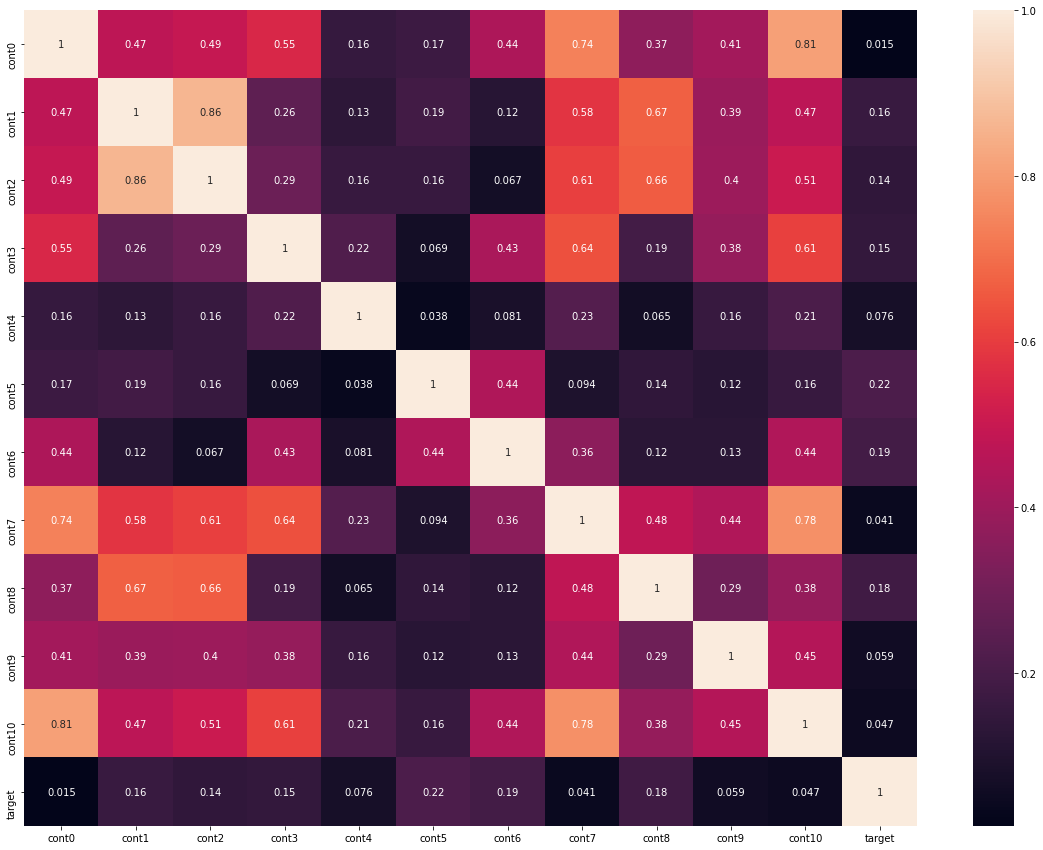

In [10]:
plt.figure(figsize=(20, 15))
sns.heatmap(abs(df.corr()), annot=True);

### Outliers

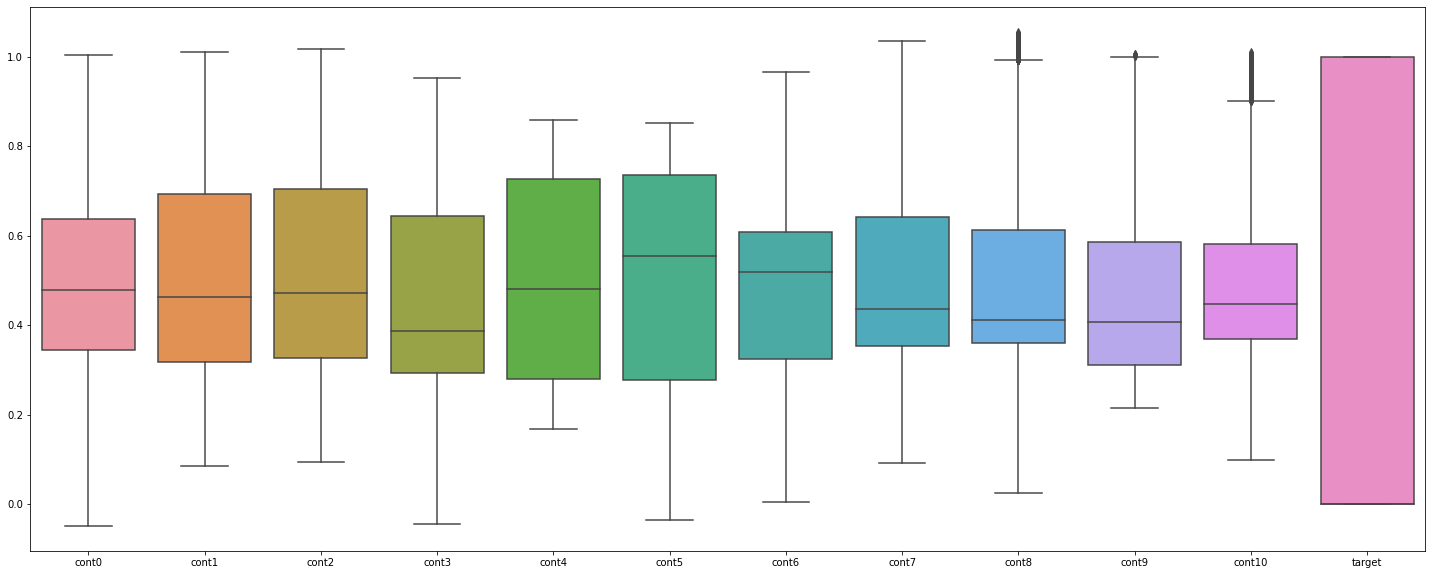

In [11]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df);

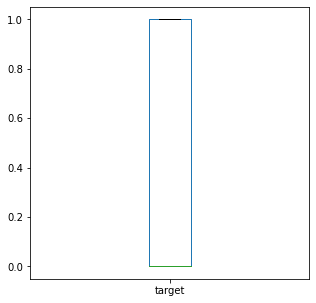

In [12]:
plt.figure(figsize=(5, 5))
df['target'].plot(kind='box');

In [13]:
y_col = 'target'
x_cols = [c for c in df.columns if c != y_col]
cols = 5
rows = math.ceil(len(x_cols)/cols)

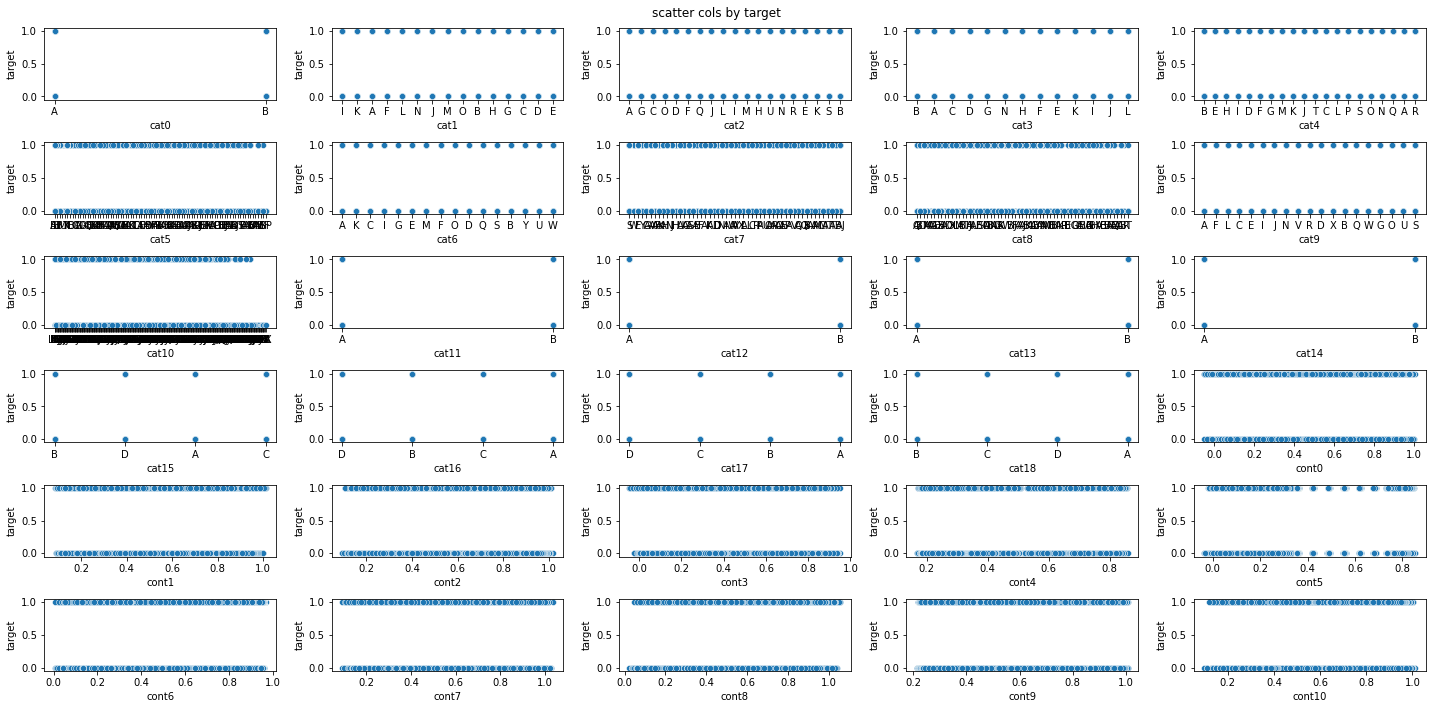

In [14]:
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
fig.suptitle('scatter cols by target')
points = [(r, c) for r in range(rows) for c in range(cols)]
for i, point in enumerate(points[:len(x_cols)]):
    sns.scatterplot(ax=axes[point], data=df, y=y_col, x=x_cols[i])
fig.tight_layout()
plt.show()